In [ ]:
!pip install bertopic Arabic-Stopwords datasets py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import re
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from datasets import load_dataset

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from bertopic import BERTopic

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
ds = load_dataset("saudinewsnet", trust_remote_code=True)
ds

README.md:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

saudinewsnet.py:   0%|          | 0.00/5.87k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31030 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['source', 'url', 'date_extracted', 'title', 'author', 'content'],
        num_rows: 31030
    })
})

In [ ]:
df = ds['train'].to_pandas()[['title', 'content', 'source', 'date_extracted']]

In [ ]:
df.shape

(31030, 4)

In [ ]:
df.head(2)

,title,content,source,date_extracted
0,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,aawsat,2015-07-21 02:51:32
1,الرئيس هادي يعين نايف البكري محافظا لعدن,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,aawsat,2015-07-21 02:51:33


In [ ]:
df['fulltext'] = df['title'] + "\n" + df['content']

In [ ]:
df.drop(columns=['title', 'content'], inplace=True)
df.head(2)

,source,date_extracted,fulltext
0,aawsat,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...
1,aawsat,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن\nأصدر...


In [ ]:
df.isnull().sum()

,0
source,0
date_extracted,0
fulltext,0


In [ ]:
print(df.shape)
df.drop_duplicates(['fulltext'], inplace=True)
print(df.shape)

(31030, 3)
(30415, 3)


In [ ]:
def clean_text(text: str):
    if not isinstance(text, str):
        return ""

    # remove urls
    text = re.sub(r"http\S+", " رابط ", text)

    # replace any digit with رقم
    text = re.sub(r"\d+", " رقم ", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([w for w in words if len(w)>1] )

    return text.lower().strip()

In [ ]:
df['fulltext'] = df['fulltext'].apply(clean_text)

In [ ]:
df['fulltext'][0]

'بريطانيا أربعة محاور لاستراتيجية جديدة تتصدى للتطرف على مدى خمس سنوات حدد رئيس الوزراء البريطاني ديفيد كاميرون اليوم الاثنين ملامح استراتيجية للتصدي للتطرف داخل بريطانيا وهي مسألة اعتبرها كاميرون `` صراع جيلنا `` متعهدا خلال خطابه في مدينة بيرمنغهام بالتصدي لهؤلاء الذين ينشرون التطرف بين الشبان المسلمين البريطانيين ورسم كاميرون الاطار العام لاستراتيجية مكافحة التطرف التي المقرر ان تنشر كاملة في وقت لاحق هذا العام والتي تسعى للتصدي لانتشار الأفكار المتطرفة التي يروج لها متشددو تنظيم `` داعش `` وحسبما تناقلت وسائل الإعلام البريطانية فإن خطة رئيس الوزراء ستكون على مدى خمسة أعوام للقضاء على التطرف الداخلي من خلال أربعة محاور وهي القضاء على إيديولوجية التطرف والوقوف في وجه عمليات التجنيد وغسل الأدمغة بالأفكار المتطرفة وإعادة اصوات الاسلام المعتدل إلى المجتمع البريطاني والتعامل مع أزمات الهوية التي يواجهها بعض المسلمين المولودين في بريطانيا وسيكون من الأهداف الرئيسية للاستراتيجية مكافحة صعود من يطلق عليهم اسم `` متطرفي الداخل `` وهو أمر يقول كاميرون انه لا يمكن عمله دون فهم الاسباب التي تجت

In [ ]:
def count_tokens(text: str):
    tokens = word_tokenize(text)
    return len(tokens)

df['token_len'] = df['fulltext'].apply(count_tokens)

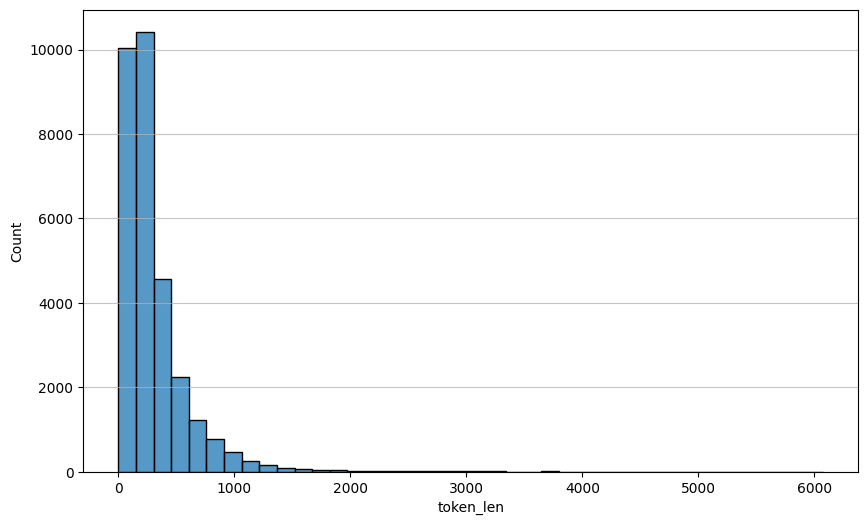

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['token_len'], bins=40)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
print(df.shape)
df = df[df['token_len'] <= 2000]
print(df.shape)

(30415, 4)
(30331, 4)


In [ ]:
df['datetime'] = df['date_extracted'].apply(lambda v: datetime.strptime(v, "%Y-%m-%d %H:%M:%S"))

df['datetime'] = df['datetime'].apply(lambda v: v.replace(hour=0, minute=0, second=0))

df.drop(columns=['date_extracted'], inplace=True)

In [ ]:
df = df.sample(frac=1)
df.head()

,source,fulltext,token_len,datetime
13866,alriyadh,الأرصاد تحذر من التعرض للشمس فترة الظهيرة حذرت...,84,2015-07-31
6908,3alyoum,فيصل الغامدي المونديال كان صرحا من نجوم فهوى ف...,235,2015-07-24
22428,alwatan,النخبة تدشن فرعا جديدا بالرياض دشنت أسواق النخ...,97,2015-08-06
26619,aleqtisadiya,أجنبي للجنة الاحتراف تعد التجربة الانتخابية لا...,408,2015-08-09
22270,alriyadh,رقم قتيلا حصيلة خروج قطارين عن السكة في الهند ...,231,2015-08-06


## Embedding

In [ ]:
from sentence_transformers import SentenceTransformer

model_id = "sentence-transformers/LaBSE"
embedding_model = SentenceTransformer(model_id, device="cuda:0")

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
news_embeddings = embedding_model.encode(df['fulltext'].values, show_progress_bar=True)

Batches:   0%|          | 0/948 [00:00<?, ?it/s]

In [ ]:
news_embeddings.shape

(30331, 768)

## Dim Reduction

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15,
                  n_components=15,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=101)

## Clustering

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=50,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

## Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(min_df=3,
                                   stop_words=stop_words,
                                   analyzer='word',
                                   max_df=0.5,
                                   ngram_range=(1, 3)
                                   )

## Topic Representer

#### KeyBERTInspired

In [ ]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

## Let's Go

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=15,
    verbose=True
)

topics, probs =  topic_model.fit_transform(
    df['fulltext'].values,
    news_embeddings
)

2025-01-01 18:53:34,054 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-01 18:54:46,342 - BERTopic - Dimensionality - Completed ✓
2025-01-01 18:54:46,347 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-01 18:54:57,041 - BERTopic - Cluster - Completed ✓
2025-01-01 18:54:57,054 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-01 18:55:55,129 - BERTopic - Representation - Completed ✓


In [ ]:
print(
    df['fulltext'].values[50],
    topics[50], probs[50]
)

الدوري الإنجليزي ينطلق بصراع رباعي يبدو أن المنافسة ستكون حامية في الموسم الجديد من الدوري الإنجليزي لكرة القدم الذي ينطلق اليوم حيث من المتوقع أن يكون الصراع على اللقب بين الرباعي تشلسي وأرسنال ومانشستر سيتي ومانشستر يونايتد وليفربول بدرجة أقل وسيقص مانشستر يونايتد شريط الموسم الجديد باختبار صعب يجمعه بضيفه توتنهام فيما يبدأ تشلسي حملة الدفاع عن لقبه اليوم أيضا على أرضه أمام سوانسي سيتي على أن يلعب أرسنال غدا بين جماهيره أيضا مع جاره وست هام يونايتد وليفربول مع مضيفه ستوك سيتي بينما تختتم المرحلة بعد غد الإثنين بلقاء مانشستر سيتي ومضيفه وست بروميتش ألبيون ويبدو تشلسي مجددا من أبرز المرشحين للفوز باللقب خصوصا أن مدربه البرتغالي جوزيه مورينيو التزم فلسفة الاستمرارية ولم يدخل أي تعديلات مؤثرة على تشكيلة الفريق ومن المرجح أل ّا يواجه تشلسي صعوبة في حسم مباراته الأولى ضد سوانسي سيتي الذي خسر مبارياته الخمس الأخيرة في الدوري أمام الفريق اللندني وإذا كان أمام مورينيو فترة أسبوع من أجل التحضير للقمة المبكرة أمام مانشسترسيتي فإن نظيره في مانشستريونايتد الهولندي لويس فان جال لا يتمتع بهذه الرفا

In [ ]:
topic_model.get_topic(17)

[('الجامعات', 0.013920596157473262),
 ('البديل', 0.00781396989000139),
 ('سوق العمل', 0.007691074261777383),
 ('المدارس', 0.007643787656047977),
 ('الطب', 0.007523262437049238),
 ('التعليمية', 0.007222067865577875),
 ('القرآن', 0.006271713571259093),
 ('الطب البديل', 0.006058131744815824),
 ('الكليات', 0.005608386310552302),
 ('الطالب', 0.005503957475756022),
 ('وزارة التعليم', 0.0052002689384415424),
 ('التعليم العام', 0.005116923727984382),
 ('الفساد', 0.004753182242311581),
 ('كليات', 0.00468714970890002),
 ('العالي', 0.004642223859182267)]

In [ ]:
df['topic'] = topics
df['prob'] = probs

In [ ]:
df['topic'].value_counts()

,count
topic,
-1,9004
0,4240
1,1588
2,915
3,806
...,...
78,63
79,61
80,57


In [ ]:
df.head()

,source,fulltext,token_len,datetime,topic,prob
13866,alriyadh,الأرصاد تحذر من التعرض للشمس فترة الظهيرة حذرت...,84,2015-07-31,13,1.000000
6908,3alyoum,فيصل الغامدي المونديال كان صرحا من نجوم فهوى ف...,235,2015-07-24,0,1.000000
22428,alwatan,النخبة تدشن فرعا جديدا بالرياض دشنت أسواق النخ...,97,2015-08-06,-1,0.000000
26619,aleqtisadiya,أجنبي للجنة الاحتراف تعد التجربة الانتخابية لا...,408,2015-08-09,12,0.987645
22270,alriyadh,رقم قتيلا حصيلة خروج قطارين عن السكة في الهند ...,231,2015-08-06,-1,0.000000


In [ ]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9004,-1_داعش_سوق عكاظ_عسير_الإرهاب,"[داعش, سوق عكاظ, عسير, الإرهاب, إيران, الطائف,...","[الملك سلمان عبدالعزيز, الشريفين الملك سلمان, ...",[حماية الشواطئ بحرم رقم متر أقر مجلس الوزراء ع...
1,0,4240,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[السعودي لكرة القدم, أندية, لاعبي, لكرة القدم,...",[الزعيم يصحو مبكرا على غير العادة بدأ الفريق ا...
2,1,1588,1_النفط_رقم رقم المائة_أسعار_مليار,"[النفط, رقم رقم المائة, أسعار, مليار, رقم مليا...","[أسعار النفط, البنوك, رقم المائة رقم, هبوط, ال...",[أسواق الخليج تنهي تداولات الأسبوع على تباين ت...
3,2,915,2_عدن_المقاومة_الحوثيين_الحوثي,"[عدن, المقاومة, الحوثيين, الحوثي, المقاومة الش...","[الحوثيين وقوات صالح, عدن, مطار عدن, الحوثيين ...",[المقاومة الشرعية تتقدم في أبين وتسيطر على عاص...
4,3,806,3_الدراسي_القبول_التعليمية_الوظائف,"[الدراسي, القبول, التعليمية, الوظائف, تعليم, ر...","[العامة للتعليم بمنطقة, الإدارة العامة للتعليم...",[تعليم جازان يبدأ في إجراء المقابلات الشخصية ا...
...,...,...,...,...,...,...
79,78,63,78_المنتدى_المعارض_الصادرات_والمؤتمرات,"[المنتدى, المعارض, الصادرات, والمؤتمرات, النفط...","[للمعارض والمؤتمرات, قطاع المعارض والمؤتمرات, ...",[رقم شوال آخر موعد لاستقبال طلبات إقامة المعار...
80,79,61,79_كلمات_أغنية_وألحان_الأغنية,"[كلمات, أغنية, وألحان, الأغنية, الفنان, الألبو...","[محمد عبده, عبدالمجيد, رقم أغنية, الأغاني, الأ...",[المهندس يطرح ألبومه بعد أيام حدد الفنان ماجد ...
81,80,57,80_للإغاثة_الملك سلمان للإغاثة_سلمان للإغاثة_س...,"[للإغاثة, الملك سلمان للإغاثة, سلمان للإغاثة, ...","[مطار عدن الدولي, الملك سلمان للإغاثة, بتأمين ...",[وصول طائرة الإغاثة السعودية الرابعة لعدن عين ...
82,81,55,81_حرس_حرس الحدود_البحث والإنقاذ_والإنقاذ,"[حرس, حرس الحدود, البحث والإنقاذ, والإنقاذ, ال...","[فرق البحث والإنقاذ, البحث والإنقاذ, والإنقاذ,...",[حرس حدود الشرقية ينقذ عددا من مرتادي شواطئ ال...


## Visualizations

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topics_per_class = topic_model.topics_per_class(
    df['fulltext'].values,
    classes=df['source'].values,
)

14it [00:28,  2.00s/it]


In [ ]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=20)

In [ ]:
topics_over_time = topic_model.topics_over_time(
    df['fulltext'].values,
    df['datetime'].values
)

18it [02:29,  8.33s/it]


In [ ]:
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[1, 2, 3, 4, 5, 6, 7, 8, 9]
)

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    df['fulltext'].values
)

100%|██████████| 82/82 [00:00<00:00, 96.22it/s]


In [ ]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

## Topic Filtering

In [ ]:
df.head()

,source,fulltext,token_len,datetime,topic,prob
13866,alriyadh,الأرصاد تحذر من التعرض للشمس فترة الظهيرة حذرت...,84,2015-07-31,13,1.000000
6908,3alyoum,فيصل الغامدي المونديال كان صرحا من نجوم فهوى ف...,235,2015-07-24,0,1.000000
22428,alwatan,النخبة تدشن فرعا جديدا بالرياض دشنت أسواق النخ...,97,2015-08-06,-1,0.000000
26619,aleqtisadiya,أجنبي للجنة الاحتراف تعد التجربة الانتخابية لا...,408,2015-08-09,12,0.987645
22270,alriyadh,رقم قتيلا حصيلة خروج قطارين عن السكة في الهند ...,231,2015-08-06,-1,0.000000


In [ ]:
df = df[ ~df['topic'].isin([-1]) ]

## Inference

In [ ]:
df['fulltext'][5]

'مذبحة حوثية في عدن والمقاومة تزحف نحو القصر ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن جنوب اليمن بعدما أمطرت ضاحية دار سعد شمال المدينة بصواريخ الكاتيوشا وقنابل الهاون مما أدى إلى مقتل رقم مدنيا على الأقل وإصابة رقم وجاء هذا القصف بينما استمرت الاشتباكات في دار سعد وصبر وفي منطقة المعاشيق بمديرية كريتر في شمال المدينة فيما واصل عناصر المقاومة الشعبية زحفهم نحو القصر الرئاسي في حي التواهي لتحريره من سيطرة المتمردين وذلك بعد أيام من إعلان حكومة الرئيس اليمني عبد ربه منصور هادي تحرير المدينة باستثناء جيوب لميليشيات الحوثيين وحليفهم الرئيس السابق علي عبد الله صالح ودخلت المقاومة الشعبية ليلا إلى حي التواهي وقال مصدر عسكري إن تلك القوات تتقدم باتجاه قصر رئاسة الجمهورية ومقر قيادة الفرقة الرابعة للجيش كما مشطت مقر الإذاعة والتلفزيون وذكر مصدر عسكري آخر أن المقاتلين على الأرض استفادوا من دعم مقاتلات التحالف العربي الذي شن نحو رقم غارة على مواقع المتمردين الحوثيين في التواهي وكذلك في الضاحيتين الشمالية والشرقية لعدن في غضون ذلك سيطرت قوات المقاومة الشعبية في محافظتي الضالع وعدن على مثلث ال

In [ ]:
_topic, _prob =  topic_model.transform([df['fulltext'][5]])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-01-01 18:59:32,083 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-01-01 18:59:50,041 - BERTopic - Dimensionality - Completed ✓
2025-01-01 18:59:50,047 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-01-01 18:59:50,049 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic, _prob

([2], array([1.]))

In [ ]:
topic_model.get_topic(_topic[0])

[('عدن', 0.043665591228830965),
 ('المقاومة', 0.042221854517275226),
 ('الحوثيين', 0.02910234898271871),
 ('الحوثي', 0.02706246658115433),
 ('المقاومة الشعبية', 0.023469331326373584),
 ('التحالف', 0.021912787286324578),
 ('اليمني', 0.020208258056737698),
 ('اليمنية', 0.017350629299655168),
 ('تعز', 0.016239953849090216),
 ('العند', 0.014925061665043727),
 ('صنعاء', 0.014230625022798076),
 ('وقوات', 0.01345170972656927),
 ('هادي', 0.013362197101380435),
 ('قوات', 0.01254202547700267),
 ('الميليشيات', 0.012133864227453002)]

In [ ]:
df[ df['topic'] == _topic[0] ].head()

,source,fulltext,token_len,datetime,topic,prob
26660,aleqtisadiya,ميليشيات الحوثي وصالح تتداعى والجيش الوطني وال...,1019,2015-08-09,2,1.00000
8451,3alyoum,مقتل حوثيين خلال تطهير قصر معاشيق المقر الأسبق...,209,2015-07-25,2,1.00000
26972,alriyadh,مقتل وإصابة أكثر من رقم عنصر ًا من قوات التمرد...,114,2015-08-09,2,1.00000
12194,alriyadh,أنباء عن اعتقال المقاومة لعبدالخالق الحوثي الم...,102,2015-07-27,2,0.81364
14373,alweeam,تقدم للمقاومة بأبين وسقوط قريب لقاعدة العند حق...,227,2015-07-31,2,1.00000
